In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('House1.csv', index_col=0, parse_dates=True)
df.head()

,Usage_kW,AC_DR_kW,UPS_kW,LR_kW,Kitchen_kW,AC_DNR_kW,AC_BR_kW
Date_Time,,,,,,,
2018-07-15 00:00:00,1.7310,0.0006,0.2575,0.3531,0.3518,0.0097,0.0001
2018-07-15 00:01:00,1.7415,0.0006,0.2854,0.3504,0.3485,0.0097,0.0002
2018-07-15 00:02:00,1.7391,0.0006,0.2836,0.3520,0.3477,0.0097,0.0002
2018-07-15 00:03:00,1.7371,0.0006,0.2864,0.3504,0.3466,0.0096,0.0002
2018-07-15 00:04:00,1.7268,0.0006,0.2819,0.3491,0.3464,0.0097,0.0002


In [3]:
by_hours_df = df.iloc[:, 0:].groupby(df.index.hour).mean()
# Rename the applicances according to the metadata provided, for more readability
by_hours_df = by_hours_df.rename(index=str, columns={
   "Usage_kW":"Total Usage",
    "AC_DR_kW":"Drawing_AC",
    "UPS_kW":"UPS",
    "LR_kW":"Living Room",
    "Kitchen_kW":"Kitchen",
    "AC_DNR_kW":"Dining Room AC",
    "AC_BR_kW":"Bedroom AC",
    
})
# The data frame aggregated by hours of a day looks like:
by_hours_df

,Total Usage,Drawing_AC,UPS,Living Room,Kitchen,Dining Room AC,Bedroom AC
Date_Time,,,,,,,
0,0.860305,0.000373,0.115003,0.086087,0.120222,0.002845,0.116772
1,0.749009,0.000330,0.107357,0.053110,0.106579,0.002313,0.100877
2,0.685416,0.000326,0.107008,0.046530,0.100006,0.002295,0.066708
3,0.656099,0.000319,0.106059,0.042460,0.095639,0.002124,0.052308
4,0.642652,0.000311,0.105013,0.042104,0.092595,0.002073,0.044017
5,0.610509,0.000307,0.102799,0.043191,0.090125,0.002202,0.039293
6,0.537123,0.000278,0.100091,0.052963,0.086485,0.002453,0.030108
7,0.522758,0.000213,0.098395,0.075484,0.107133,0.004299,0.011482
8,0.623943,0.001369,0.130857,0.126306,0.172940,0.007916,0.004610


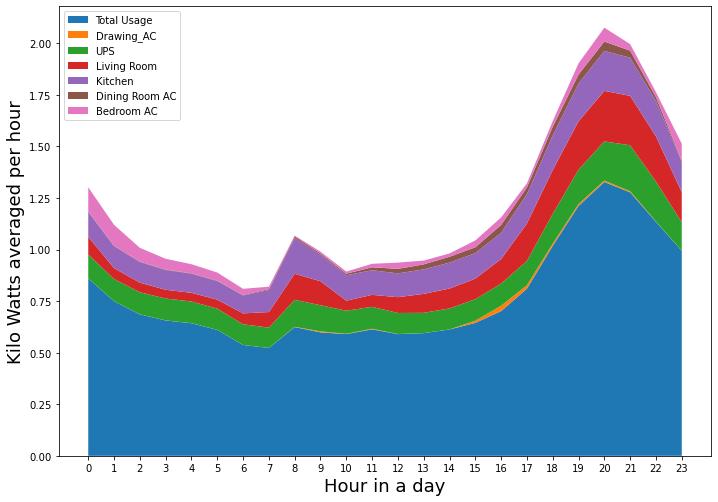

In [4]:
# Set size of plot
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# Stackplot
ax.stackplot(list(range(24)), np.transpose(by_hours_df.values), labels=by_hours_df.columns.values)
plt.xlabel('Hour in a day', fontsize=18)
plt.ylabel('Kilo Watts averaged per hour', fontsize=18)
plt.xticks(np.arange(0, 24, 1.0))
ax.legend(loc=2)

Text(0.5, 1.0, 'Bedroom AC')

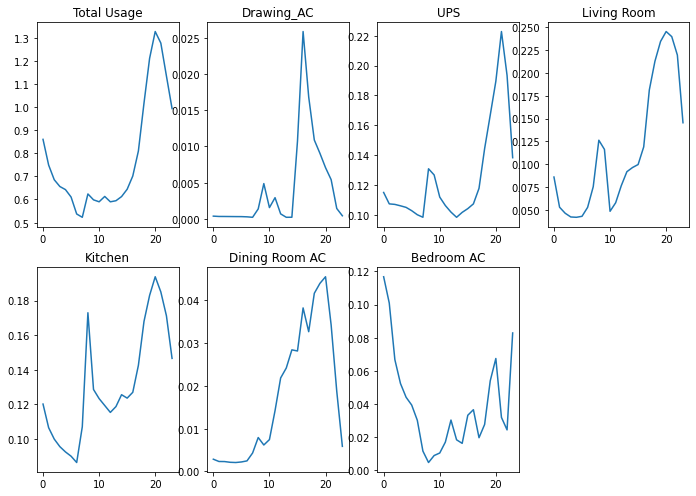

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

plt.subplot(241)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Total Usage'].values)
plt.title('Total Usage')

plt.subplot(242)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Drawing_AC'].values)
plt.title('Drawing_AC')

plt.subplot(243)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['UPS'].values)
plt.title('UPS')

plt.subplot(244)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Living Room'].values)
plt.title('Living Room')

plt.subplot(245)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Kitchen'].values)
plt.title('Kitchen')

plt.subplot(246)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Dining Room AC'].values)
plt.title('Dining Room AC')

plt.subplot(247)
# Usage of various appliances
plt.plot(list(range(24)), by_hours_df['Bedroom AC'].values)
plt.title('Bedroom AC')